# Compare prediction

In [1]:
import sys
sys.path.insert(0,"/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0,"..")

import json
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from tree.parameters import Ts

# Load test results on radical

In [15]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)

radical_data_df = pd.read_csv("../data/radical_data.csv")
radical_gav_df = pd.read_csv("../data/radical_gav.csv")

test_radical_data_df = radical_data_df[radical_data_df["smiles"].isin(test_df["radical_smiles"])]
test_radical_data_df = test_radical_data_df.reset_index(drop=True)
test_radical_gav_df = radical_gav_df[radical_gav_df["smiles"].isin(test_df["radical_smiles"])]
test_radical_gav_df = test_radical_gav_df.reset_index(drop=True)

test_radical_sidt_df = pd.read_csv("../models/split-random_run-basecase/frac-1.0/test_radical.csv")
test_radical_sidt_df

,radical_smiles,H298 (kcal/mol),S298 (cal/mol/K),Cp300 (cal/mol/K),Cp400 (cal/mol/K),Cp500 (cal/mol/K),Cp600 (cal/mol/K),Cp800 (cal/mol/K),Cp1000 (cal/mol/K),Cp1500 (cal/mol/K),comment
0,[O]C(=O)OC(=O)O,-175.469790,84.080735,28.387505,32.570774,35.109357,37.022046,38.764725,39.088809,37.903059,Thermo group additivity estimation: group(O2s-...
1,CC(=O)COC(O[O])OC(C)=O,-154.665989,136.091115,46.739279,54.819261,63.001727,70.410243,82.184670,90.456302,101.195359,Thermo group additivity estimation: group(O2s-...
2,[O]OC(=O)OC(=O)O,-157.909442,89.385512,30.946395,36.115151,39.108763,41.152616,43.540604,44.565908,44.806515,Thermo group additivity estimation: group(O2s-...
3,C[C]1OC(=O)C(O)(C=O)O1,-150.746878,105.055268,35.291629,42.054000,48.043727,52.899268,60.321924,65.427980,74.486164,Thermo group additivity estimation: group(O2s-...
4,CC1(OO)COC(O[O])C(=O)O1,-132.077719,110.194410,47.097572,55.885851,63.784776,70.052221,78.273454,84.648906,92.775708,Thermo group additivity estimation: group(O2s-...
...,...,...,...,...,...,...,...,...,...,...,...
217,C=CC#CCO[O],85.786900,90.529380,26.706960,32.640750,36.929980,41.928740,47.728090,52.058380,58.441970,Thermo group additivity estimation: group(O2s-...
218,[C]1=CC=CC1,94.873000,69.536610,17.676192,23.598190,28.535210,32.514590,38.371880,42.379700,48.199380,Thermo group additivity estimation: group(Cs-(...
219,[CH]1C=C1,102.280900,56.304132,12.762741,14.951170,16.996190,18.887830,21.902970,24.032510,27.334670,Thermo group additivity estimation: group(Cs-(...
220,[CH]=CC=C=C,120.458874,51.574044,22.031756,27.236924,30.952042,33.800005,37.914383,40.673444,44.813790,Thermo group additivity estimation: group(Cds-...


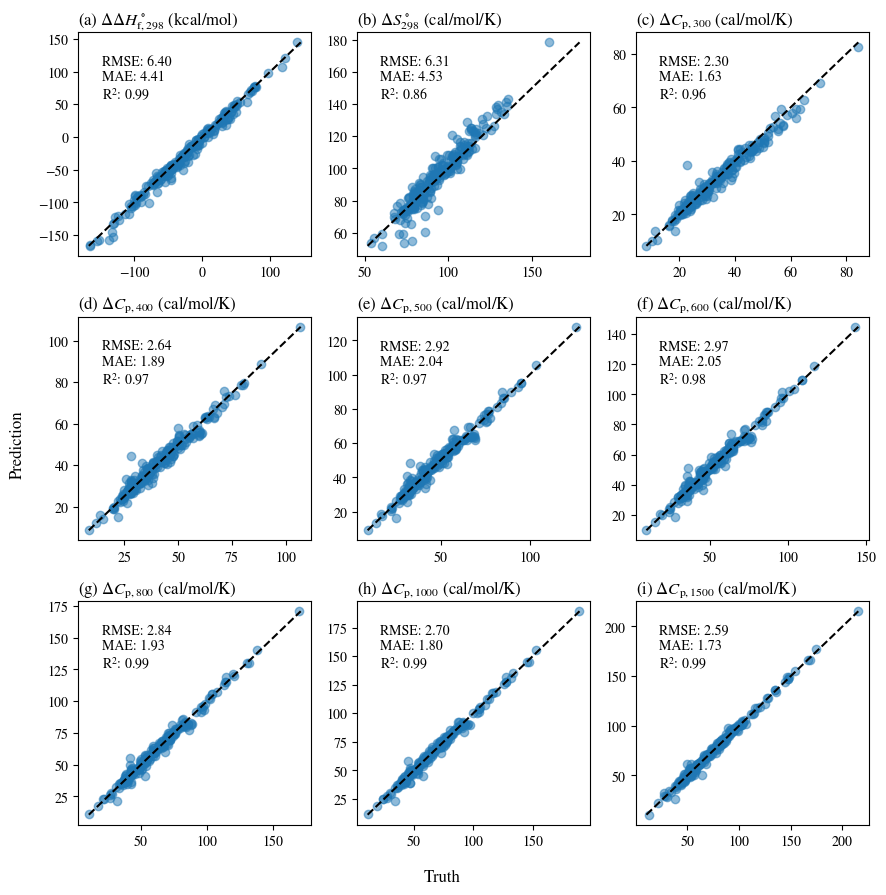

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_radical_data_df["H298 (kcal/mol)"]
pred_ys = test_radical_gav_df["H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_radical_data_df["S298 (cal/mol/K)"]
pred_ys = test_radical_gav_df["S298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_radical_data_df[f"Cp{T} (cal/mol/K)"]
    pred_ys = test_radical_gav_df[f"Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/radical_empirical_parity.pdf", bbox_inches="tight")

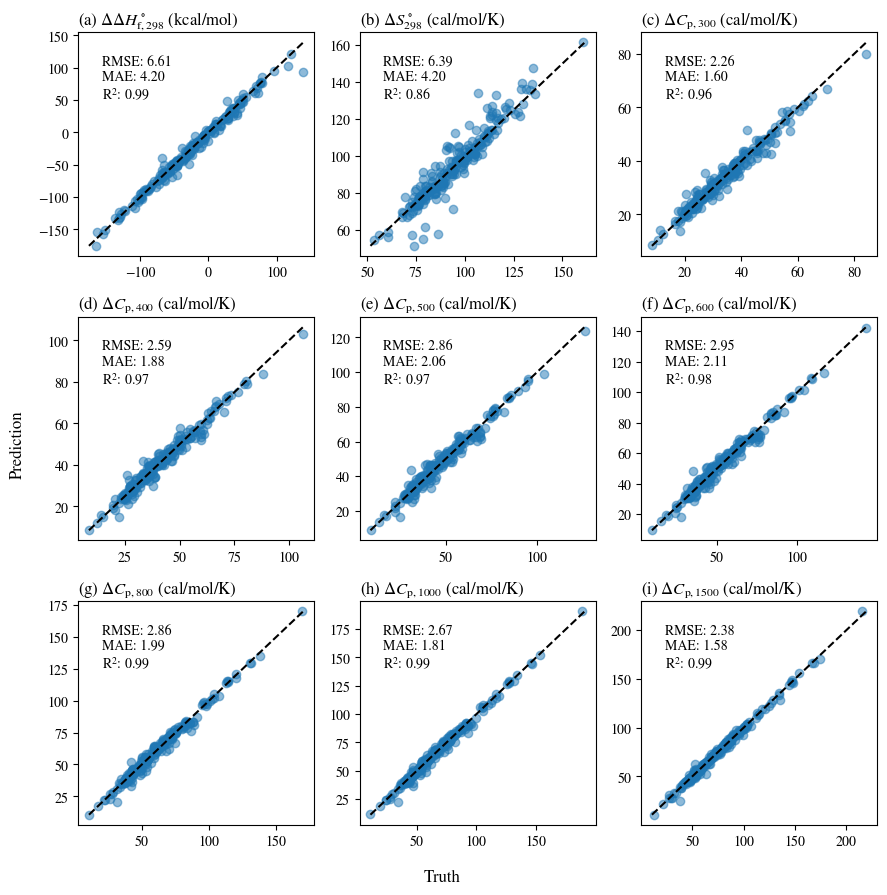

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_radical_data_df["H298 (kcal/mol)"]
pred_ys = test_radical_sidt_df["H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_radical_data_df["S298 (cal/mol/K)"]
pred_ys = test_radical_sidt_df["S298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_radical_data_df[f"Cp{T} (cal/mol/K)"]
    pred_ys = test_radical_sidt_df[f"Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/radical_sidt_parity.pdf", bbox_inches="tight")

# Load test results on HBI

In [2]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)
empirical_df = pd.read_csv("../data/hbi_prediction_empirical.csv")
empirical_df = empirical_df.loc[test_inds, :]
empirical_df = empirical_df.reset_index(drop=True)

In [3]:
sidt_df = pd.read_csv("../models/split-random_run-aleatoric_prepruning-upper_bound/frac-1.0/test.csv")
empirical_retrained_df = pd.read_csv("../models/split-random_run-retrain_empirical/test.csv")

# Plot: bounded fraction vs. estimated uncertainty

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 7), sharey=True)

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label].values
pred_ys = sidt_df[label].values
pred_uncs = sidt_df["unc_"+label].values
true_errs = np.abs(pred_ys - true_ys)
bounded_ys = (true_errs <= pred_uncs)
min_true_err = np.min(true_errs)
max_true_err = np.max(true_errs)
bins = np.linspace(min_true_err, max_true_err+1, 10)
inds = np.digitize(pred_uncs, bins)
bounded_fracs = [sum(bounded_ys[inds==ind])/len(bounded_ys[inds==ind]) if len(bounded_ys[inds==ind]) != 0 else np.nan for ind in range(len(bins))]
plot_xs = [bins[ind] for ind in range(len(bins)) if not np.isnan(bounded_fracs[ind])]
plot_ys = [bounded_fracs[ind] for ind in range(len(bins)) if not np.isnan(bounded_fracs[ind])]
ax.plot(plot_xs, plot_ys, "--o")
ax.set_ylim([0, 1.05])
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = sidt_df[label]
pred_uncs = sidt_df["unc_"+label].values
bounded_ys = ((pred_ys - true_ys).abs() <= pred_uncs).values
min_true_err = np.min(pred_uncs)
max_true_err = np.max(pred_uncs)
bins = np.linspace(min_true_err, max_true_err+1, 20)
inds = np.digitize(pred_uncs, bins)
bounded_fracs = [sum(bounded_ys[inds==ind])/len(bounded_ys[inds==ind]) if len(bounded_ys[inds==ind]) != 0 else np.nan for ind in range(len(bins))]
plot_xs = [bins[ind] for ind in range(len(bins)) if not np.isnan(bounded_fracs[ind])]
plot_ys = [bounded_fracs[ind] for ind in range(len(bins)) if not np.isnan(bounded_fracs[ind])]
ax.plot(plot_xs, plot_ys, "--o")
ax.set_ylim([0, 1.05])
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    pred_uncs = sidt_df["unc_"+label].values
    bounded_ys = ((pred_ys - true_ys).abs() <= pred_uncs).values
    min_true_err = np.min(pred_uncs)
    max_true_err = np.max(pred_uncs)
    bins = np.linspace(min_true_err, max_true_err+1, 20)
    inds = np.digitize(pred_uncs, bins)
    bounded_fracs = [sum(bounded_ys[inds==ind])/len(bounded_ys[inds==ind]) if len(bounded_ys[inds==ind]) != 0 else np.nan for ind in range(len(bins))]
    plot_xs = [bins[ind] for ind in range(len(bins)) if not np.isnan(bounded_fracs[ind])]
    plot_ys = [bounded_fracs[ind] for ind in range(len(bins)) if not np.isnan(bounded_fracs[ind])]
    ax.plot(plot_xs, plot_ys, "--o")
    ax.set_ylim([0, 1.05])
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Frac. of true err. $\leq$ pred. unc. (N={len(test_df.index)})")
fig.supxlabel(f"True error", y=0.03)

fig.tight_layout()
fig.savefig("../figures/sidt_bounded_fraction_vs_true_error.pdf", bbox_inches="tight")

# Plot: error distribution

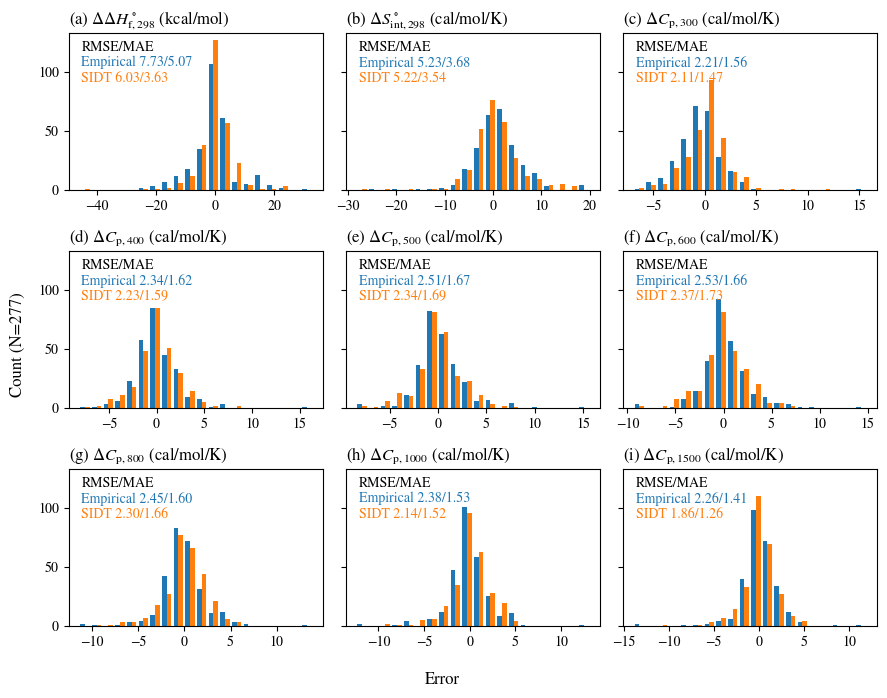

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
    ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
    ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/empirical_vs_sidt_error_hist.pdf", bbox_inches="tight")

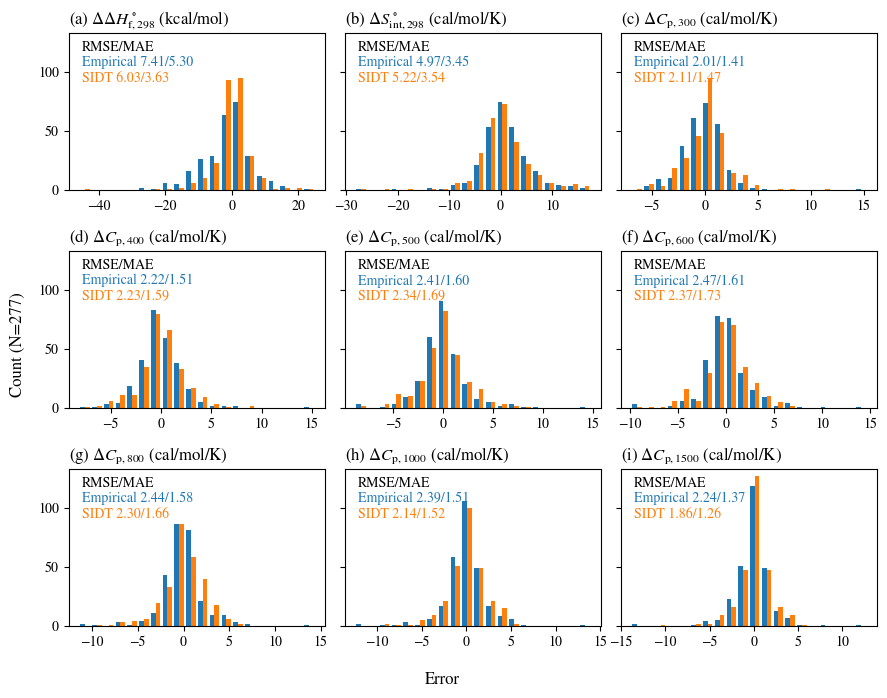

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
bins = 20

ax = axs.flat[0]
label = "HBI_H298 (kcal/mol)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
label = "HBI_Sint298 (cal/mol/K)"
true_ys = test_df[label]
pred_ys = empirical_retrained_df[label]
empirical_errors = pred_ys - true_ys
empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
empirical_mae = mean_absolute_error(true_ys, pred_ys)

true_ys = test_df[label]
pred_ys = sidt_df[label]
sidt_errors = pred_ys - true_ys
sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
sidt_mae = mean_absolute_error(true_ys, pred_ys)

ax.hist([empirical_errors, sidt_errors], bins=bins)
ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    label = f"HBI_Cp{T} (cal/mol/K)"
    true_ys = test_df[label]
    pred_ys = empirical_retrained_df[label]
    empirical_errors = pred_ys - true_ys
    empirical_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    empirical_mae = mean_absolute_error(true_ys, pred_ys)

    true_ys = test_df[label]
    pred_ys = sidt_df[label]
    sidt_errors = pred_ys - true_ys
    sidt_rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    sidt_mae = mean_absolute_error(true_ys, pred_ys)

    ax.hist([empirical_errors, sidt_errors], bins=bins)
    ax.text(0.05, 0.95, "RMSE/MAE", ha="left", va="top", transform=ax.transAxes,)
    ax.text(0.05, 0.95, "\n"+f"Empirical {empirical_rmse:.2f}/{empirical_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C0")
    ax.text(0.05, 0.95, "\n\n"+f"SIDT {sidt_rmse:.2f}/{sidt_mae:.2f}", ha="left", va="top", transform=ax.transAxes, color="C1")
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/empirical_retrained_vs_sidt_error_hist.pdf", bbox_inches="tight")

# Plot: parity plot

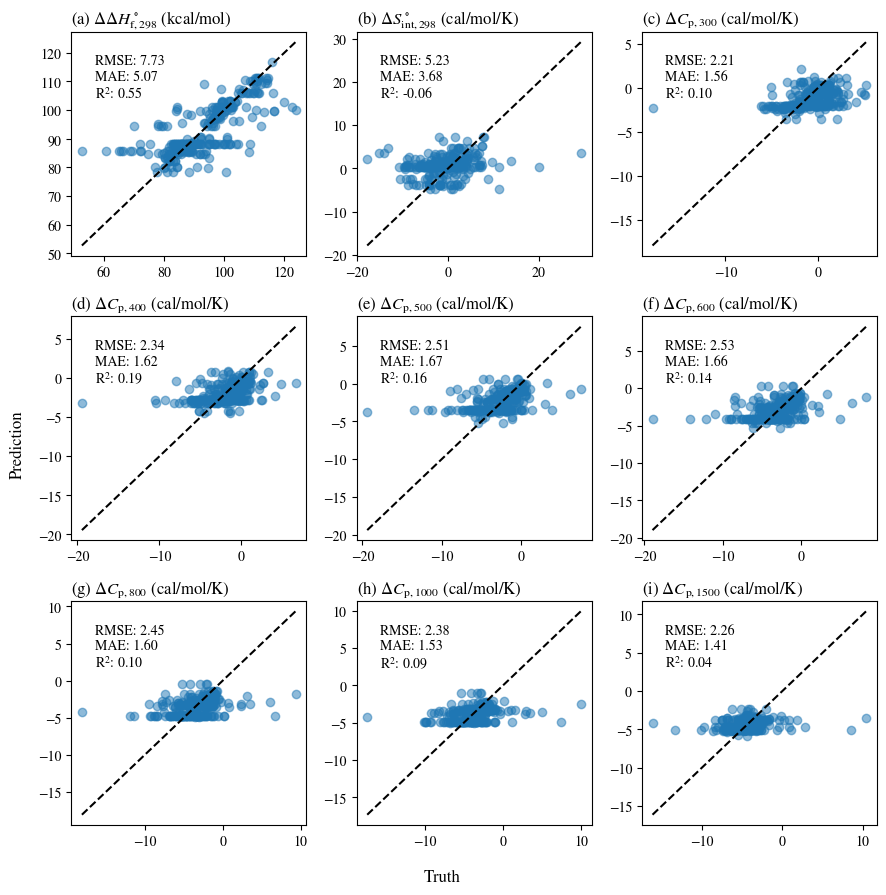

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/empirical_parity.pdf", bbox_inches="tight")

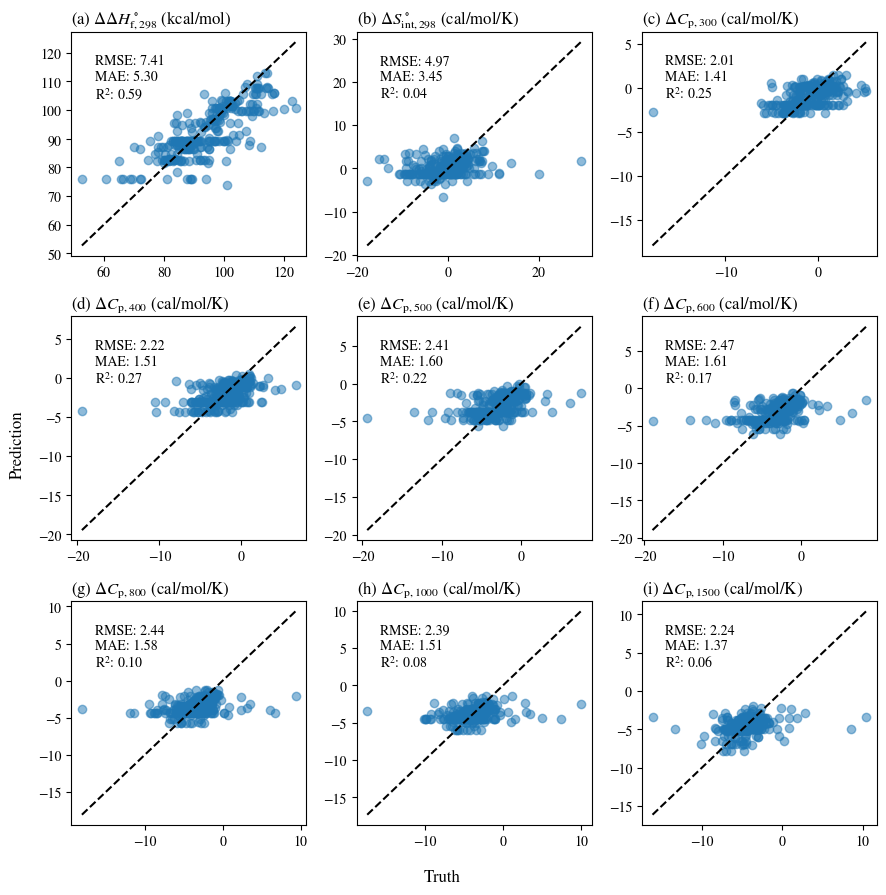

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_retrained_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_retrained_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_retrained_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/empirical_retrained_parity.pdf", bbox_inches="tight")

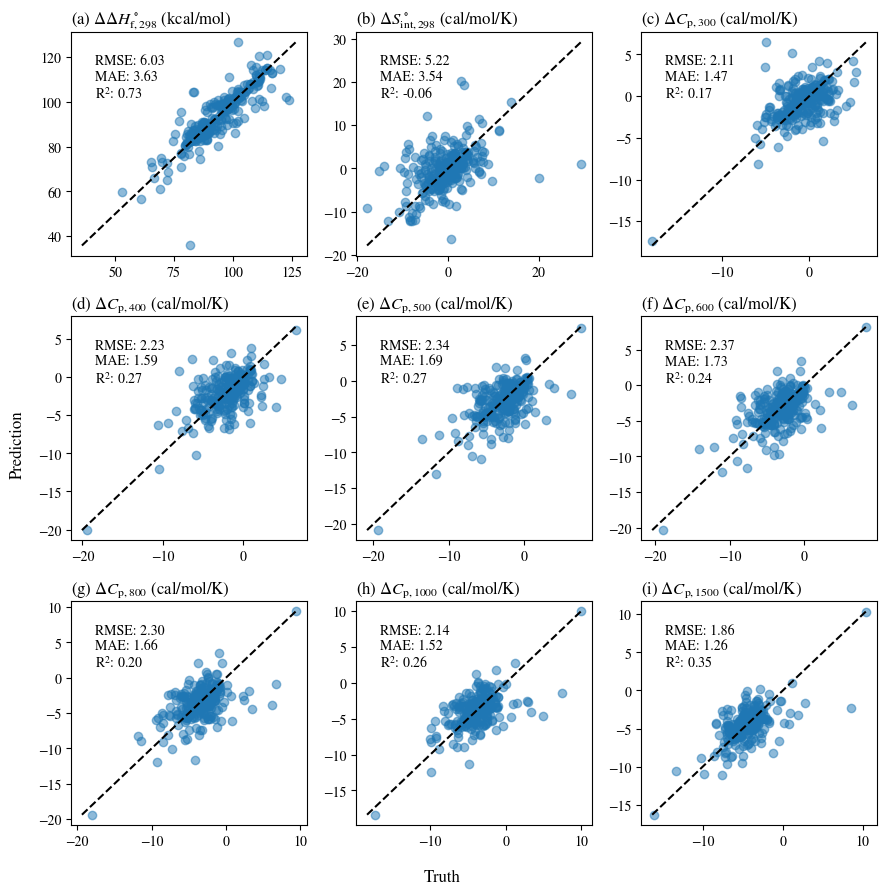

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = sidt_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = sidt_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = sidt_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/sidt_parity.pdf", bbox_inches="tight")

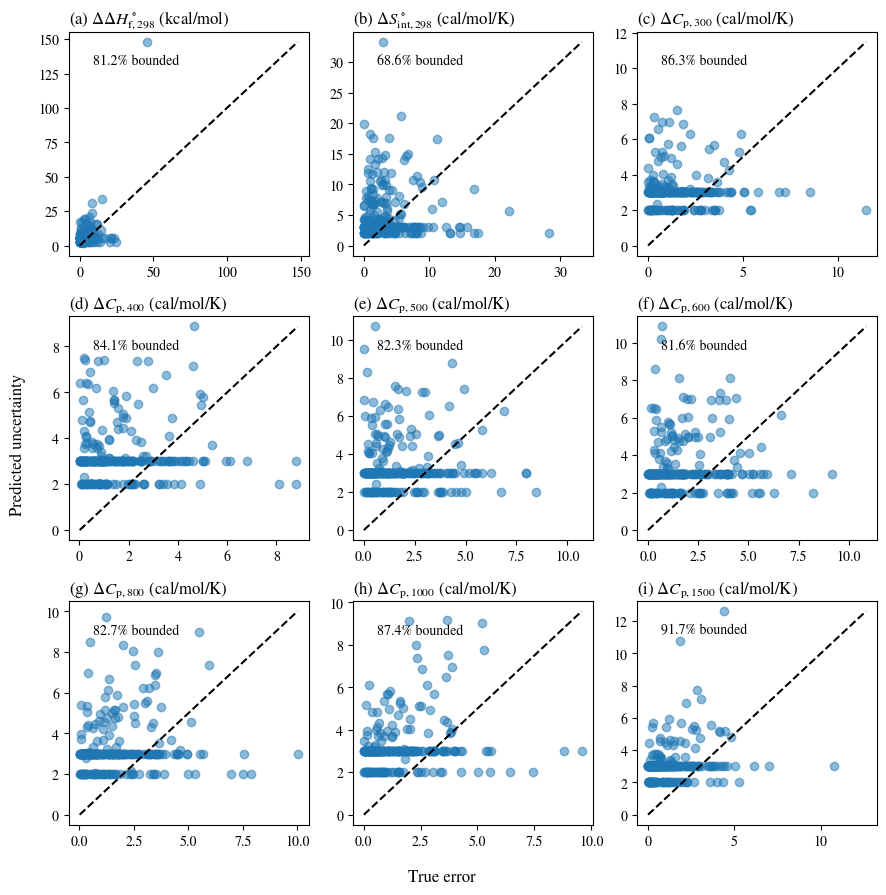

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = (sidt_df["HBI_H298 (kcal/mol)"] - test_df["HBI_H298 (kcal/mol)"]).abs()
pred_ys = sidt_df["unc_HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

ax = axs.flat[1]
true_ys = (sidt_df["HBI_Sint298 (cal/mol/K)"] - test_df["HBI_Sint298 (cal/mol/K)"]).abs()
pred_ys = sidt_df["unc_HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = (sidt_df[f"HBI_Cp{T} (cal/mol/K)"] - test_df[f"HBI_Cp{T} (cal/mol/K)"]).abs()
    pred_ys = sidt_df[f"unc_HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
    ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
    # ax.set_yscale("log")
    # ax.set_xscale("log")

fig.supylabel(f"Predicted uncertainty")
fig.supxlabel(f"True error")

fig.tight_layout()
fig.savefig("../figures/sidt_unc_parity.pdf", bbox_inches="tight")